<a href="https://colab.research.google.com/github/KrinalM/Krinalben_INFO5731_Spring2024/blob/main/Monpara_Krinalben_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [47]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [48]:
data = pd.read_excel("/content/Reviews_SentimentAnalysis.xlsx")
text_data = data["clean_text"]  # clean_text column holds the text data
print(text_data.head())

0                                                issue
1    purchased device worked advertised never much ...
2    work expected sprung higher capacity think mad...
3    think worked greathad diff bran gb card went s...
4    bought retail packaging arrived legit orange e...
Name: clean_text, dtype: object


In [49]:
# checking for missing value
print(text_data.isnull().sum())

0


In [50]:
# filling missing value
text_data = text_data.fillna("")

In [51]:
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(text_data)

In [52]:
# Define number of topics
n_topics = 10

# Train the model
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=0)
lda_model.fit(features)

LatentDirichletAllocation(random_state=0)

In [53]:
def get_topic_description(topic_idx, vocab):
    topic_words = lda_model.components_[topic_idx].argsort()[:-11:-1]
    topic_words = [vocab[i] for i in topic_words]
    return " ".join(topic_words)

# Get vocabulary from TF-IDF
vocab = vectorizer.get_feature_names_out()

# Get topics and descriptions
topics = [get_topic_description(i, vocab) for i in range(n_topics)]
topics

['card phone video use im format get work note camera',
 'card tablet problem great speed purchase phone one sd format',
 'issue run apps brand find speed local great plenty safe',
 'card save camera gopro use record hour picture phone adapter',
 'card phone work gb great memory price fast good galaxy',
 'work card far great recommend camera bought phone fast would',
 'card gb memory phone work video use sd galaxy great',
 'card great work memory fast video galaxy use able need',
 'card work phone gb great sd sandisk samsung tablet file',
 'sandisk card product great always memory good work quality would']

In [54]:
print("Features used:", "TF-IDF")
print("Top 10 topics:")
for i, topic in enumerate(topics):
    print(f"Topic {i+1}: {topic}")

Features used: TF-IDF
Top 10 topics:
Topic 1: card phone video use im format get work note camera
Topic 2: card tablet problem great speed purchase phone one sd format
Topic 3: issue run apps brand find speed local great plenty safe
Topic 4: card save camera gopro use record hour picture phone adapter
Topic 5: card phone work gb great memory price fast good galaxy
Topic 6: work card far great recommend camera bought phone fast would
Topic 7: card gb memory phone work video use sd galaxy great
Topic 8: card great work memory fast video galaxy use able need
Topic 9: card work phone gb great sd sandisk samsung tablet file
Topic 10: sandisk card product great always memory good work quality would


# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

1.For sentiment classification, the selection of features plays a crucial role in determining the performance of the classifier. In this scenario, I would choose the following features:

Bag-of-Words (BoW) Representation: BoW representation is a commonly used technique in text analysis where the frequency of each word occurring in a document is used as a feature. This representation captures the presence and frequency of words in the text, which can be indicative of sentiment. However, it doesn't consider the order of words or grammar.

TF-IDF (Term Frequency-Inverse Document Frequency): TF-IDF is another popular technique that evaluates the importance of a word in a document relative to a corpus. It considers both the frequency of the word in the document and the inverse frequency of the word in the corpus. TF-IDF helps in identifying words that are important within a document but not necessarily common across the entire corpus.

Word Embeddings: Word embeddings such as Word2Vec, GloVe, or FastText represent words in a continuous vector space where similar words are closer together. These embeddings capture semantic relationships between words, which can be useful for sentiment analysis.

These features are chosen because they capture different aspects of the text data and have been proven effective in various NLP tasks, including sentiment analysis.



In [55]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# Load the dataset
data = pd.read_excel("/content/Reviews_SentimentAnalysis.xlsx")

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['clean_text'], data['sentiment'], test_size=0.2, random_state=42)

# Define feature extraction techniques
bow_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

# Define classifiers
nb_classifier = MultinomialNB()
lr_classifier = LogisticRegression()

# Build pipelines
nb_pipeline = make_pipeline(bow_vectorizer, nb_classifier)
lr_pipeline = make_pipeline(tfidf_vectorizer, lr_classifier)

# Remove rows with missing values
data.dropna(inplace=True)

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['clean_text'], data['sentiment'], test_size=0.2, random_state=42)

# Perform cross-validation
nb_cv_scores = cross_val_score(nb_pipeline, X_train, y_train, cv=5)
lr_cv_scores = cross_val_score(lr_pipeline, X_train, y_train, cv=5)

# Fit classifiers
nb_pipeline.fit(X_train, y_train)
lr_pipeline.fit(X_train, y_train)

# Evaluate performance on the test set
nb_predictions = nb_pipeline.predict(X_test)
lr_predictions = lr_pipeline.predict(X_test)

# Calculate metrics
def evaluate_model(predictions, y_test):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='macro')
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    return accuracy, precision, recall, f1

nb_accuracy, nb_precision, nb_recall, nb_f1 = evaluate_model(nb_predictions, y_test)
lr_accuracy, lr_precision, lr_recall, lr_f1 = evaluate_model(lr_predictions, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
print("Naive Bayes Classifier:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1 Score:", nb_f1)

Naive Bayes Classifier:
Accuracy: 0.6616915422885572
Precision: 0.3873514501786753
Recall: 0.34163504111321946
F1 Score: 0.30294241960228563


In [57]:
print("\nLogistic Regression Classifier:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1)


Logistic Regression Classifier:
Accuracy: 0.6517412935323383
Precision: 0.2227891156462585
Recall: 0.32107843137254904
F1 Score: 0.26305220883534136


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
# Load the train and test datasets
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [60]:
# Drop the 'Id' column as it's not needed for prediction
train_data.drop(columns=['Id'], inplace=True)
test_data.drop(columns=['Id'], inplace=True)

In [61]:
# Check for missing values
print(train_data.isnull().sum())

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64


In [62]:
# Handle missing values for numerical columns in the train dataset
numerical_cols_train = train_data.select_dtypes(include=np.number).columns.tolist()
train_data[numerical_cols_train] = train_data[numerical_cols_train].fillna(train_data[numerical_cols_train].mean())

# Handle missing values for numerical columns in the test dataset
numerical_cols_test = test_data.select_dtypes(include=np.number).columns.tolist()
test_data[numerical_cols_test] = test_data[numerical_cols_test].fillna(test_data[numerical_cols_test].mean())

# Handle missing values for categorical columns in the train dataset
categorical_cols_train = train_data.select_dtypes(exclude=np.number).columns.tolist()
train_data[categorical_cols_train] = train_data[categorical_cols_train].fillna(train_data[categorical_cols_train].mode().iloc[0])

# Handle missing values for categorical columns in the test dataset
categorical_cols_test = test_data.select_dtypes(exclude=np.number).columns.tolist()
test_data[categorical_cols_test] = test_data[categorical_cols_test].fillna(test_data[categorical_cols_test].mode().iloc[0])

These features are selected based on the assumption that they have a strong correlation with the sale price of houses, as suggested by the EDA findings and domain knowledge. However, it's essential to validate these assumptions through statistical analysis and model performance evaluation.

In [63]:
# Select features for regression model based on EDA
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

In [64]:
# Add target variable to selected features
selected_features.append('SalePrice')

In [65]:
# Subset the data with selected features
train_selected = train_data[selected_features]

In [66]:
# Split data into features and target variable
X = train_selected.drop(columns=['SalePrice'])
y = train_selected['SalePrice']

In [67]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [69]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [70]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [71]:
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Mean Squared Error: 1576962754.8842602
Root Mean Squared Error: 39710.99035385872
R-squared Score: 0.7944073417103643


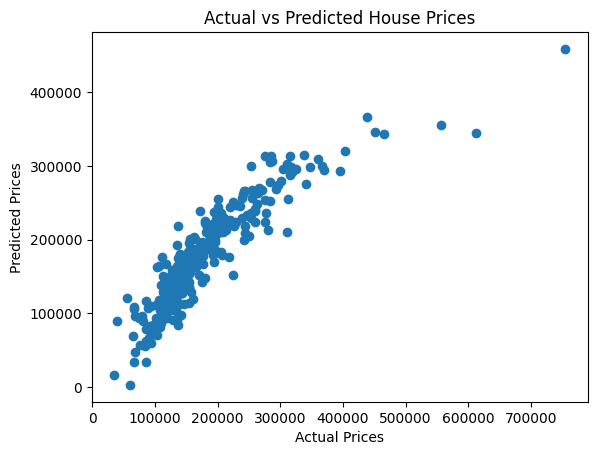

In [72]:
# Plotting actual vs predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


For this task, I'll use the BERT (Bidirectional Encoder Representations from Transformers) model from the Hugging Face repository. BERT is a powerful pre-trained language model that has been trained on a large corpus of text data from various sources, including BooksCorpus and English Wikipedia. It consists of 12 transformer layers for the base model (BERT base) and 24 transformer layers for the large model (BERT large), with 110 million and 340 million parameters respectively.

In [73]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Load dataset
dataset = pd.read_excel('/content/Reviews_SentimentAnalysis.xlsx')

# Convert string labels to numerical labels
label_encoder = LabelEncoder()
dataset['sentiment'] = label_encoder.fit_transform(dataset['sentiment'])

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# Tokenize text data
tokenized_texts = [tokenizer.encode(text, add_special_tokens=True) for text in dataset['clean_text']]

# Predict sentiment polarity
predicted_sentiments = []
for tokens in tokenized_texts:
    inputs = tokenizer.encode_plus(tokens, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = logits.argmax().item()
    predicted_sentiments.append(predicted_class)

# Evaluate performance
accuracy = accuracy_score(dataset['sentiment'], predicted_sentiments)
precision = precision_score(dataset['sentiment'], predicted_sentiments, average='macro')
recall = recall_score(dataset['sentiment'], predicted_sentiments, average='macro')
f1 = f1_score(dataset['sentiment'], predicted_sentiments, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Token indices sequence length is longer than the specified maximum sequence length for this model (522 > 512). Running this sequence through the model will result in indexing errors


Accuracy: 0.17782217782217782
Precision: 0.11607278540644698
Recall: 0.33925607621126347
F1 Score: 0.16982742908668835


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Advantages:

Pre-trained Knowledge: BERT has been pre-trained on a large corpus of text data, allowing it to capture complex language patterns and semantics.
Bidirectional Context: BERT considers the entire context of a sentence bidirectionally, which helps in understanding the sentiment expressed in the text more accurately.
Fine-tuning Flexibility: While we're not fine-tuning BERT in this case, it's worth mentioning that fine-tuning BERT on domain-specific data can further enhance its performance for sentiment analysis tasks.

Disadvantages:

Computational Resources: BERT is a large model with a significant number of parameters, requiring substantial computational resources for both training and inference.
Token Limitations: BERT has a maximum token limit for input sequences, which may pose challenges when dealing with long texts.
Domain Adaptation: BERT might not perform optimally on domains significantly different from its pre-training data, necessitating domain-specific fine-tuning for better performance.

Selecting appropriate evaluation metrics and understanding their implications in the context of sentiment analysis was challenging, especially considering imbalanced classes or nuanced sentiment expressions.